# VNA measurements of lines.
https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/driver_examples/Qcodes%20example%20with%20Rohde%20Schwarz%20ZNB.ipynb 

In [283]:
%matplotlib nbagg
import sys
import matplotlib.pyplot as plt
import qcodes as qc
import numpy as np
#import instrument
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB

from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes import new_experiment, Station, Instrument

# Bluefors fridge log tunnel

## Bluefors log opening


In [ ]:
#set the path here of the shared desktop file
BF_PC_PATH = '\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\' 



In [ ]:
import csv
class BF_Logfile():
    def __init__(self, logfile_path):
        #initiate the path here
        self.logfile_path = logfile_path
    
    def make_timestamp(days_in_the_past = 0):
        """
        by default makes today
        """
        return datetime.datetime.today() - datetime.timedelta(days=days_in_the_past)
    
    def open_file(logfile_name, timestamp=None):
        
        if timestamp is None:
            timestamp = self.make_timestamp()
     
        ds = '%02d-%02d-%02d'%(timestamp.year-2000, timestamp.month, timestamp.day) 
        pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'
        
        file_list = []
        with open(pth) as csvFile:
            reader = csv.reader(csvFile)
            for row in reader:
                #print(row)
                file_list.append(row)
        csvFile.close()

        
    

['28-04-19', '00:00:45', 'CH1', 'P1  ', '1', ' 2.50E-6', '0', '1', 'CH2', 'P2  ', '1', ' 7.34E-1', '0', '1', 'CH3', 'P3  ', '1', ' 4.00E+0', '0', '1', 'CH4', 'P4  ', '1', ' 7.40E+1', '0', '1', 'CH5', 'P5  ', '1', ' 7.98E+1', '0', '1', 'CH6', 'P6', '1', ' 2.31E-1', '0', '1', '']


<IPython.core.display.Javascript object>


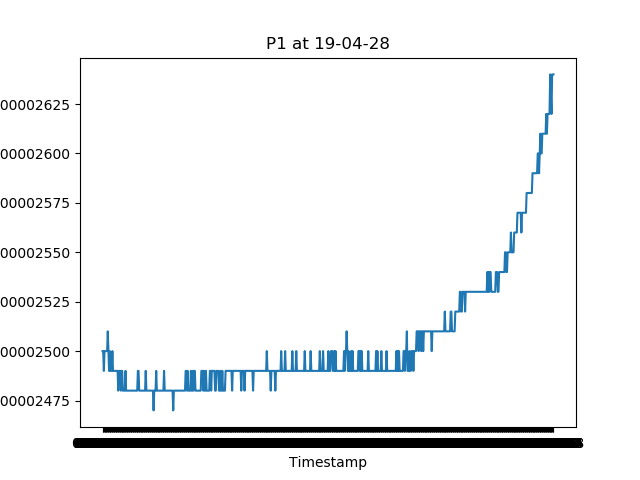

<IPython.core.display.Javascript object>


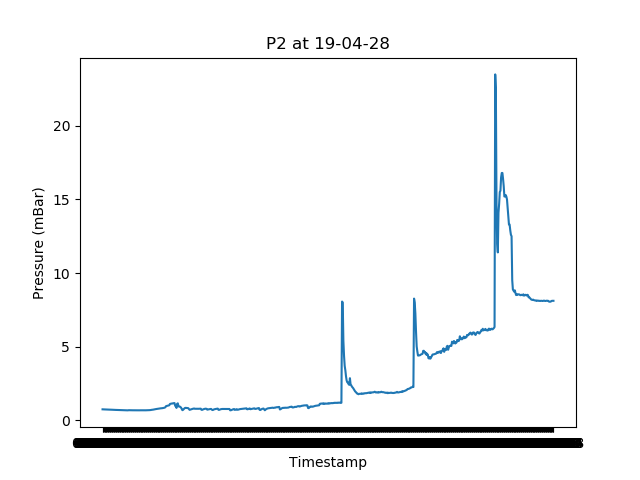

<IPython.core.display.Javascript object>


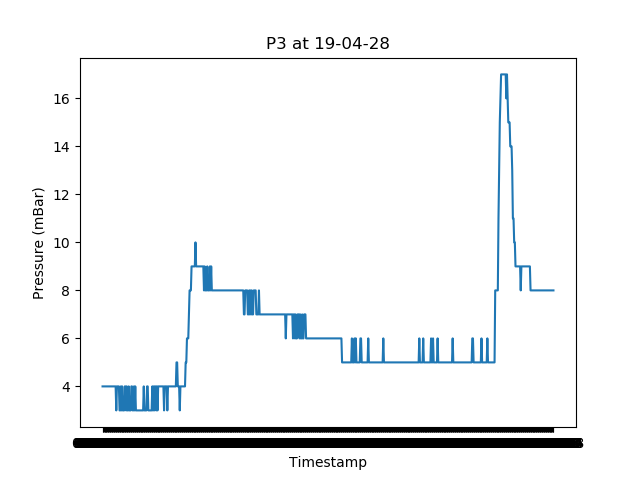

<IPython.core.display.Javascript object>


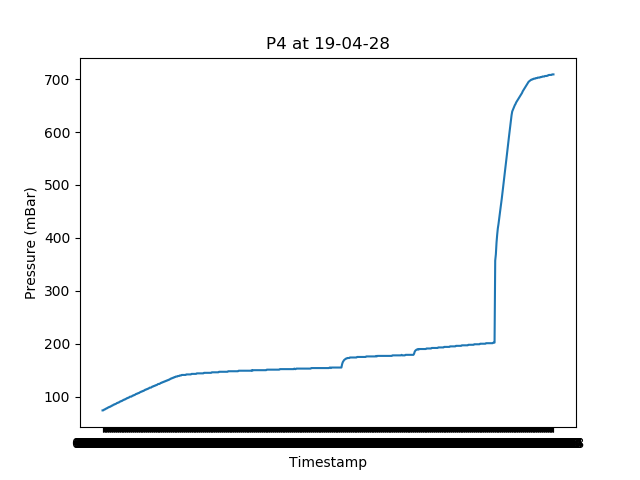

<IPython.core.display.Javascript object>


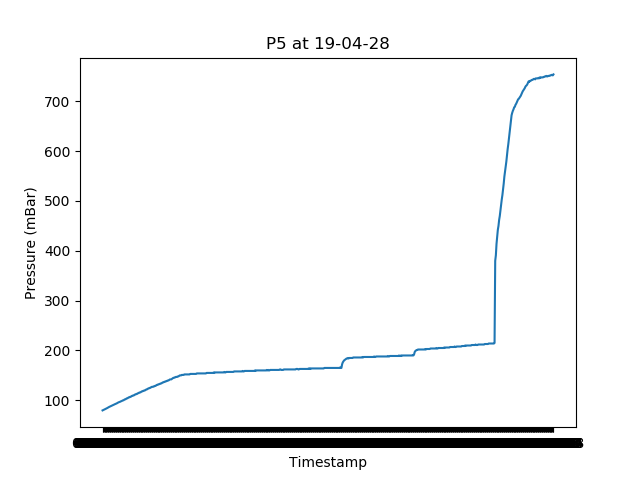

<IPython.core.display.Javascript object>


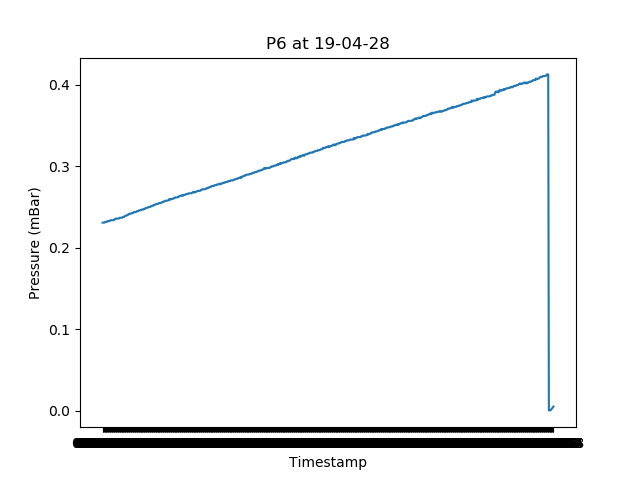

In [330]:
import csv
BF_PC_PATH = '\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\' 

#code to get the timestamp copied here from the thermometer class

logfile_name = 'maxigauge'
days_in_the_past = 0
ts = datetime.datetime.today() - datetime.timedelta(days=days_in_the_past)
ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day) 
pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'

file_list = []
with open(pth) as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        #print(row)
        file_list.append(row)
csvFile.close()

#
print(file_list[0])
times = [file_list[i][1] for i in range(len(file_list))]
Ps = []
for k in range(0,6):
    Ps.append(np.array([float(file_list[i][5+k*6]) for i in range(len(file_list))]))

i_start = 0
i_stop = -1
for k in range(len(Ps)):
    plt.figure()
    plt.plot(times[i_start:i_stop], Ps[k][i_start:i_stop])
    plt.ylabel('Pressure (mBar)')
    plt.xlabel('Timestamp')
    plt.title('P%d at ' % (k+1) + ds )
    

## Thermometer using BF logs

In [287]:
#set the path here of the shared desktop file

class Thermometer(Instrument):
    
    def __init__(self, name, logfile_path, **kw):
        super().__init__(name, **kw)        
        self.add_parameter('temperature', get_cmd=self._get_temperature, set_cmd=None, unit='K')
        
        self.add_parameter('counter', get_cmd=self._counter, set_cmd=None, unit='')
        self._ind = 0
        print('Path of network drive(set this manually dear USER): ', logfile_path)
        self.logfile_path = logfile_path
        
    def _counter(self):
        self._ind += 1
        return self._ind
    def _get_temperature(self):
        ts = datetime.datetime.today()
        ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
        pth = self.logfile_path + ds + '\\CH9 T '+ds+'.log'
        time.sleep(0.1)
        try:
            T = np.loadtxt(pth, usecols = (2), delimiter = ',')[-1]
        except: # in the first few seconds of a day, a new log file hasn't been created
            ts = datetime.datetime.today() - datetime.timedelta(days=1) # use the last entry in the previous day
            ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
            pth = self.logfile_path + ds + '\\CH9 T '+ds+'.log'
            T = np.loadtxt(pth, usecols = (2), delimiter = ',')[-1]
        return T
    
        
    
T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
T_probe.temperature()



Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


3.6019999999999999

In [ ]:
BF_PC_PATH = '\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\'
ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
pth = BF_PC_PATH+ ds + '\\CH9 T '+ds+'.log'

In [207]:
%matplotlib inline

In [165]:
vna = ZNB.ZNB('VNA', 'USB0::0x0AAD::0x01A1::101879::INSTR', init_s_params=False)
station = qc.Station(vna)
# the channel we want to measure. we set init_s_params false to not have to measure all channels, thus saving time 
channel_name = 'S12' ##Now we add a channel S12: Since the HEMT is connected to port 1. 
vna.add_channel(channel_name)

KeyError: 'Another instrument has the name: VNA'

To use the VNA we likely want to turn on RF Power, which is off by default for safty in this driver. The driver default to low power but for safety lets set it to -50 dBm. The rf can be turned on and off globally and the power adjusted individually for each channel

In [151]:
vna.channels.autoscale()
vna.channels.power(-40)

d:\onedrive\bf3\code\qcodes\qcodes\instrument\parameter.py:1218: UserWarning: MultiParameters do not support set at this time.
  warnings.warn('MultiParameters do not support set at this time.')


In [396]:
#vna.channels.power(-50)
#vna.rf_off()
vna.channels.autoscale()

In [137]:
station = qc.Station(vna)

In [356]:
#initialize database
import datetime
dataset_name = 'ABS_W1_5_1_1'
qc.config["core"]["db_location"] = datetime.date.today().strftime(r'D:\OneDrive\BF3\Data\%Y%m%d_'+dataset_name+'.db')
# automatically uses a different DB file for each month
qc.dataset.database.initialise_database()
qc.config.core.db_location

'D:\\OneDrive\\BF3\\Data\\20190429_ABS_W1_5_1_1.db'

In [357]:
exp = qc.new_experiment("VNA analysis", sample_name="lines")

In [345]:
import time
import numpy as np
def do_single_sweep(n_pts = 10000, f_start = 3.2e9, f_stop = 6.5e9, power=-60, n_avg=10, channel_name='S12'):

    # let's set the trace properties. 
    trace = getattr(vna.channels, channel_name)
    trace.avg(n_avg)
    trace.npts(n_pts)
    trace.power(power)
    trace.start(f_start)
    trace.stop(f_stop)
    vna.rf_on()
    
    
    #now setup the qcodes measurement object
    meas = Measurement()
    #meas.register_parameter(temperature, setpoints=['time',])
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency', unit='Hz',
                                   paramtype='array')
    meas.register_custom_parameter('time', unit='s', paramtype='numeric')
    meas.register_custom_parameter('power', unit='dBm', setpoints=['time'])
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                    setpoints=['frequency'],
                                   paramtype='array'),
    meas.register_custom_parameter('magnitude_raw', unit='V', 
                                   setpoints=['frequency'],
                                   paramtype='array')
    meas.register_custom_parameter('phase', unit='rad', 
                                   setpoints=[ 'frequency'],
                                   paramtype='array')
    
    with meas.run() as datasaver:
        fvals = np.linspace(trace.start(), trace.stop(), trace.npts())
        mag, phase = trace.trace_mag_phase()
        mag_db = 20*np.log10(mag) #convert to dB
        result = [ ('time', time.time()),
           # (temperature, temperature()),
           # (temperature_sample, temperature_sample()),
            ('frequency', fvals),
            ('magnitude_raw', mag),
            ('magnitude_dB',mag_db ),
            ('phase', phase),
            ('power', power)]
        datasaver.add_result(
            *result
           )
    return datasaver.run_id


def do_single_sweep_with_temperature(n_pts = 10000, f_start = 3.2e9, f_stop = 6.5e9, power=-60, n_avg=10, channel_name='S12'):

    """
    Saves a timestamp and a temperature. 
    """
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()
    
    # let's set the trace properties. 
    trace = getattr(vna.channels, channel_name)
    trace.avg(n_avg)
    trace.npts(n_pts)
    trace.power(power)
    trace.start(f_start)
    trace.stop(f_stop)
    vna.rf_on()
    
    #now setup the qcodes measurement object
    meas = Measurement()
    #meas.register_parameter(temperature, setpoints=['time',])
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency', unit='Hz',
                                   paramtype='array')
    meas.register_custom_parameter('time', unit='s', paramtype='numeric')
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric', setpoints=['time'])
    meas.register_custom_parameter('power', unit='dBm', setpoints=['time'])
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                    setpoints=['frequency'],
                                   paramtype='array'),
    meas.register_custom_parameter('magnitude_raw', unit='V', 
                                   setpoints=['frequency'],
                                   paramtype='array')
    meas.register_custom_parameter('phase', unit='rad', 
                                   setpoints=[ 'frequency'],
                                   paramtype='array')
    
    with meas.run() as datasaver:
        fvals = np.linspace(trace.start(), trace.stop(), trace.npts())
        mag, phase = trace.trace_mag_phase()
        mag_db = 20*np.log10(mag) #convert to dB
        result = [ ('time', time.time()),
           # (temperature, temperature()),
           # (temperature_sample, temperature_sample()),
            ('frequency', fvals),
            ('magnitude_raw', mag),
            ('magnitude_dB',mag_db ),
            ('phase', phase),
            ('power', power),
            ('temperature', temperature)]
        datasaver.add_result(
            *result
           )
    return datasaver.run_id

In [348]:
power_levels = list(range(5,15,5))
res_freqs = [3.535e9, 4.020e9, 4.847e9, 5.889e9]
df = 0.1e9

for power in power_levels:   
    for freq in res_freqs:
        print(freq-df)
        print(freq+df)
        print(power)
        run_id = do_single_sweep_with_temperature(n_pts = 30000, f_start = freq-df, f_stop = freq+df,
                                                  power=power, n_avg=30, channel_name=channel_name)
        
        
        


3435000000.0
3635000000.0
5
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 861
3920000000.0
4120000000.0
5
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 862
4747000000.0
4947000000.0
5
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 863
5789000000.0
5989000000.0
5
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 864
3435000000.0
3635000000.0
10
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 865
3920000000.0
4120000000.0
10


In [395]:
run_id = do_single_sweep_with_temperature(n_pts = 10000, f_start = 3e9, f_stop = 7e9,
                                                  power=-10, n_avg=5, channel_name=channel_name)

Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 18


<IPython.core.display.Javascript object>


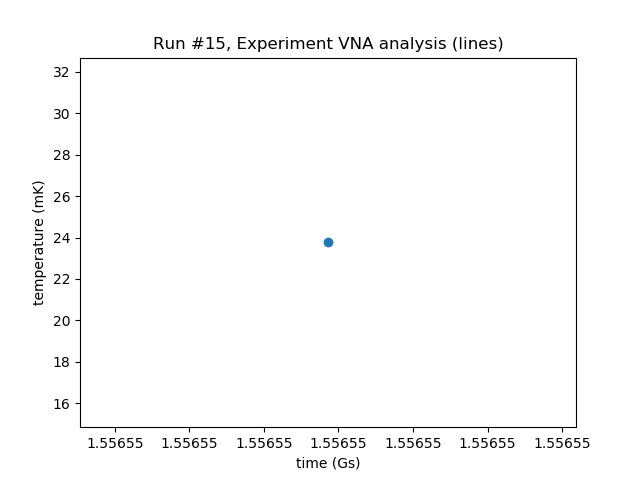

<IPython.core.display.Javascript object>


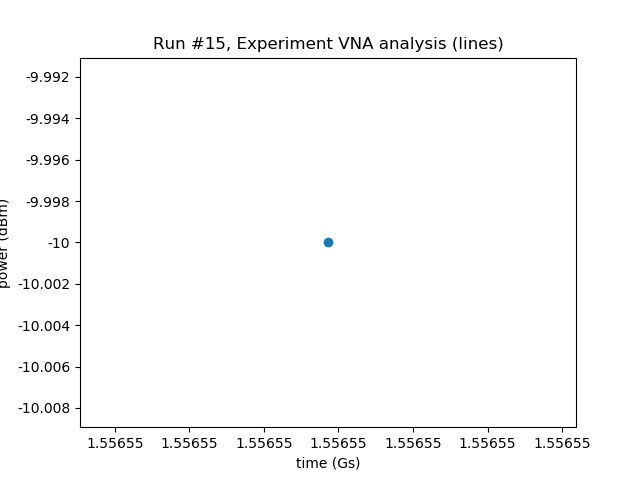

<IPython.core.display.Javascript object>


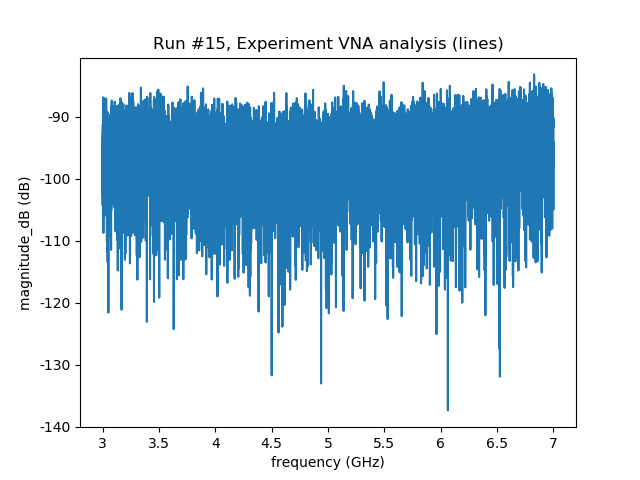

<IPython.core.display.Javascript object>


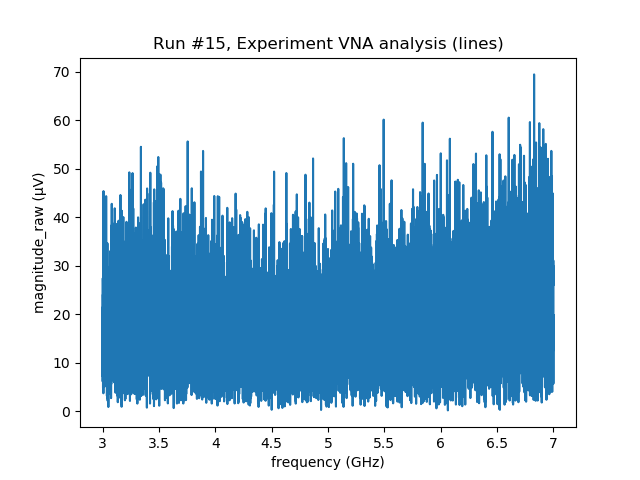

<IPython.core.display.Javascript object>


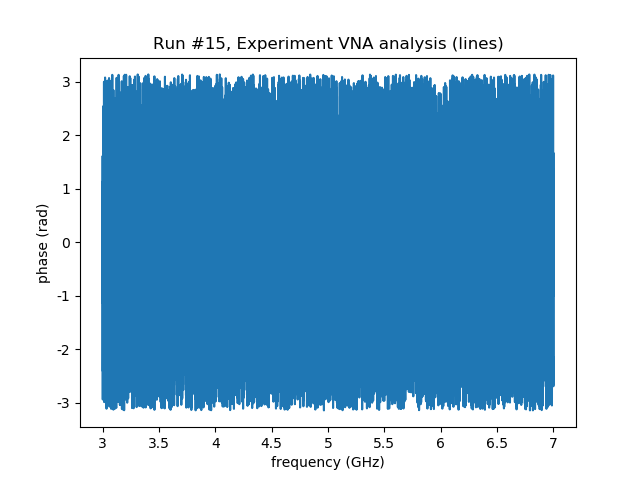

In [389]:
aves, bla = plot_by_id(15)

<IPython.core.display.Javascript object>


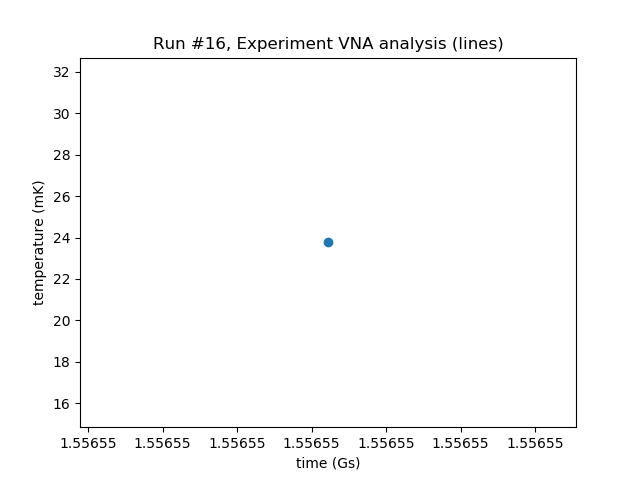

<IPython.core.display.Javascript object>


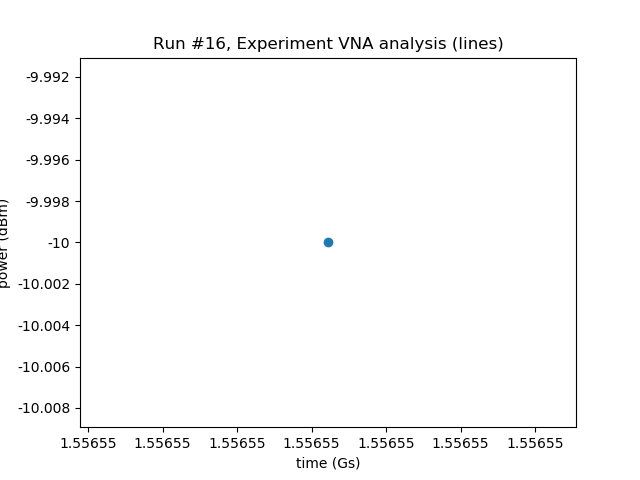

<IPython.core.display.Javascript object>


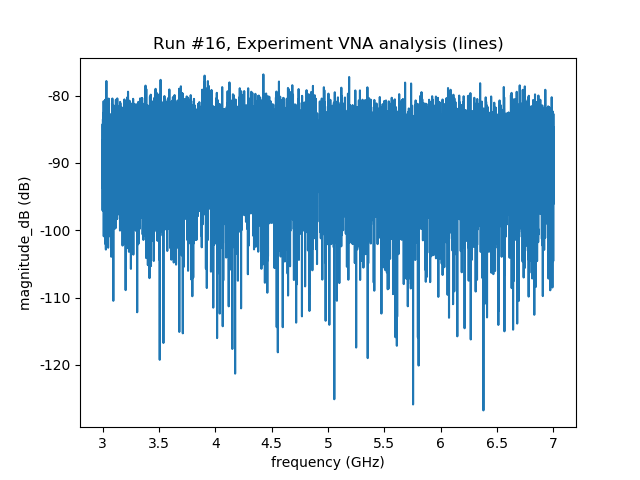

<IPython.core.display.Javascript object>


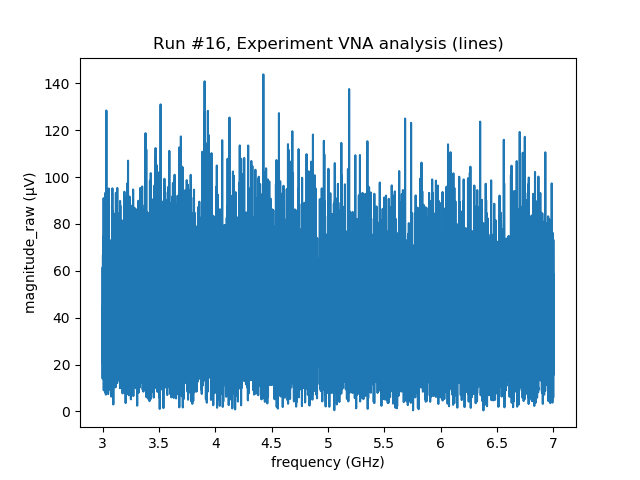

<IPython.core.display.Javascript object>


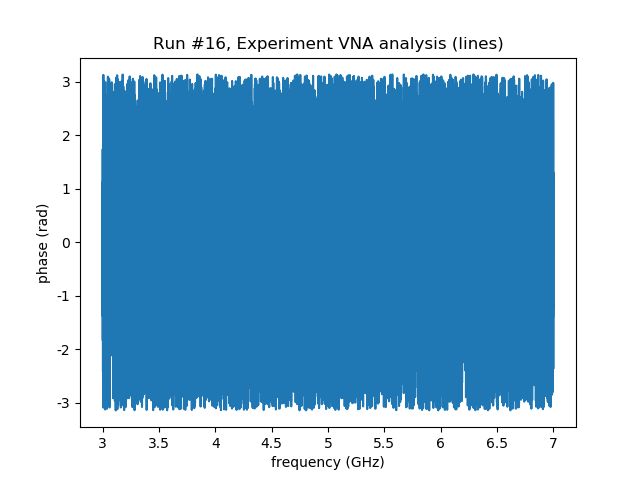

In [390]:
aves, bla = plot_by_id(16)

In [392]:
vna.rf_off()

Starting experimental run with id: 23


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


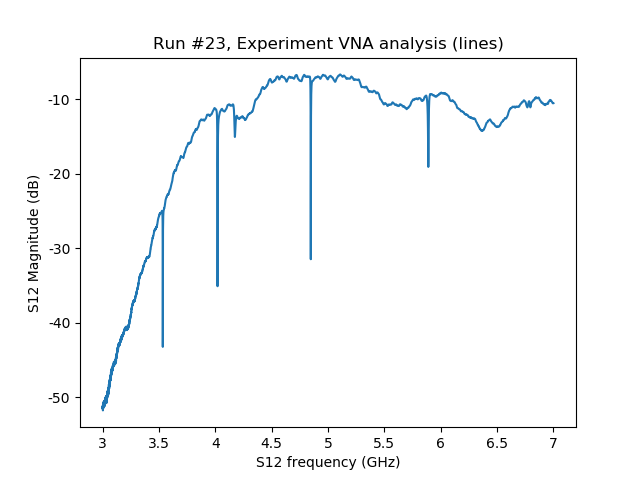

In [404]:
meas = Measurement()
vna.channels.S12.format('dB')
meas.register_parameter(vna.channels.S12.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S12.trace.get()
    datasaver.add_result((vna.channels.S12.trace, get_v))
ax, cbax = plot_by_id(datasaver.run_id)

In [402]:
n_pts = 10000
f_start = 3e9
f_stop = 7e9
power=-10
n_avg=5
channel_name=channel_name

meas = Measurement()

meas.register_custom_parameter(
        name = "Frequency", label = "Frequency", unit='Hz',
        paramtype='array'
)

meas.register_custom_parameter(
        name = "Re_S12", label = "Re_S12", unit="V",
        setpoints=["Frequency"], paramtype='array'
)

meas.register_custom_parameter(
        name = "Im_S12", label = "Im_S12", unit="V",
        setpoints=["Frequency"], paramtype='array'
)

meas.register_custom_parameter('Magnitude', unit='V', 
        setpoints=['Frequency'], paramtype='array'
)

meas.register_custom_parameter('Phase', unit='rad', 
        setpoints=['Frequency'], paramtype='array'
)

meas.register_custom_parameter('trace_direct', unit='dB', 
        setpoints=['Frequency'], paramtype='array'
)


trace = getattr(vna.channels, channel_name)
trace.avg(n_avg)
trace.npts(n_pts)
trace.power(power)
trace.start(f_start)
trace.stop(f_stop)
vna.rf_on()
with meas.run() as datasaver:
    freq = np.linspace(f_start, f_stop, n_pts)
    
    mag, phase = trace.trace_mag_phase()
    
    trace_direct = vna.S12.trace()
    Cdat = np.exp(2.j*np.pi*freq*1e-9)*trace_direct
    
    V_real, V_im = Cdat.real, Cdat.imag
    
    result = [ 
            ("Frequency", freq),
            ("Re_S12", V_real),
            ("Im_S12", V_im),
            ('Magnitude', mag),
            ('Phase', phase),
            ('trace_direct', trace_direct)
            ]
    datasaver.add_result(
            *result
           )
    


Starting experimental run with id: 22


<IPython.core.display.Javascript object>


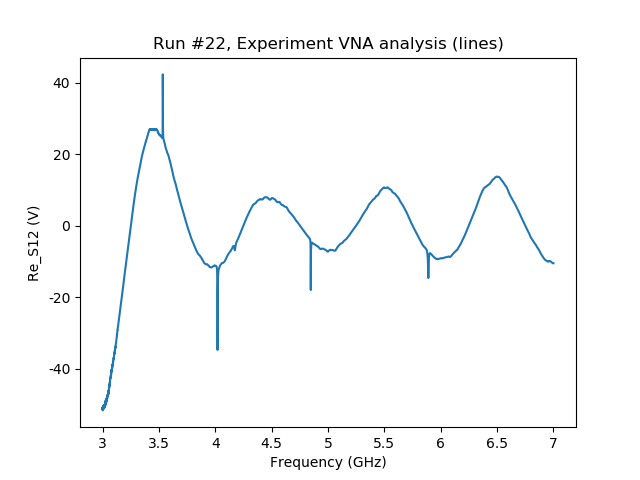

<IPython.core.display.Javascript object>


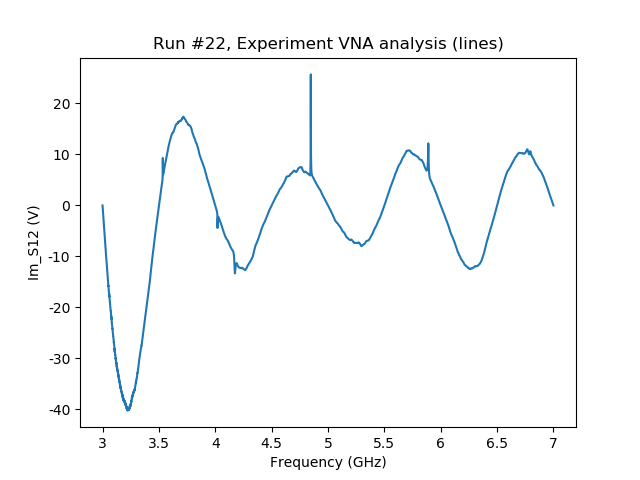

<IPython.core.display.Javascript object>


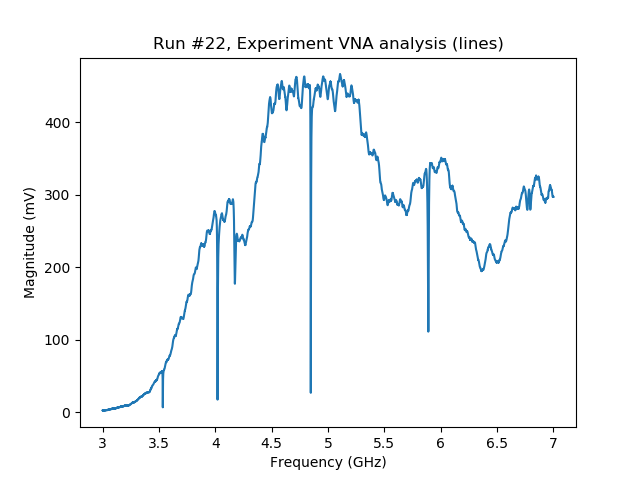

<IPython.core.display.Javascript object>


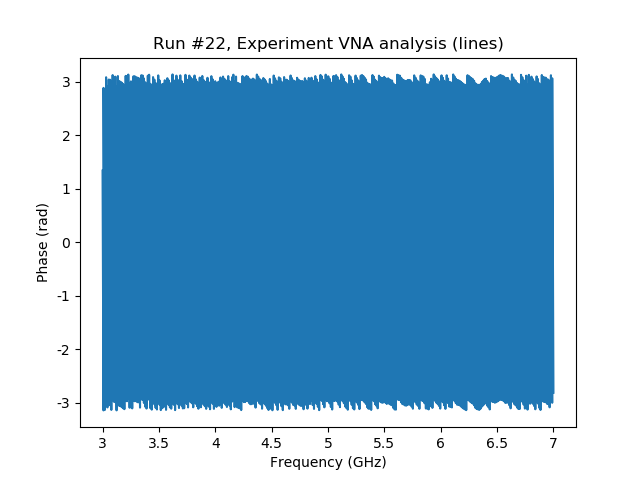

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


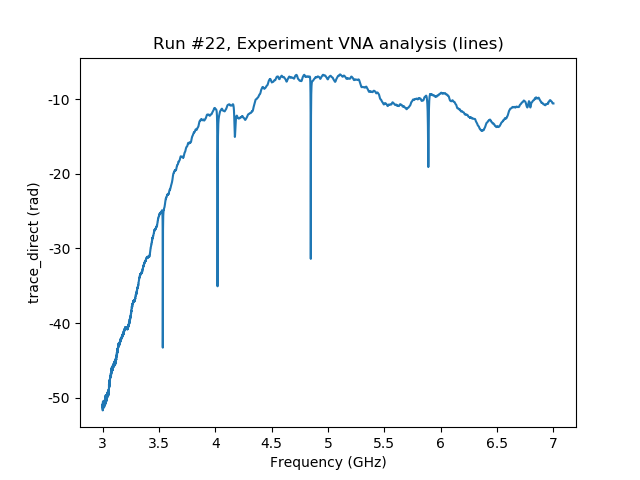

In [403]:
ax, cbax = plot_by_id(datasaver.run_id)

# MDac

In [246]:
sys.path.append(r"D:\OneDrive\BF3\Code");
sys.path.append(r"D:\OneDrive\BF3\Code\labtools-master")
sys.path.append(r"D:\OneDrive\BF3\Code\StationQ\MDAC\Driver")
from MDAC import MDAC

from pytopo.sweep import sweep, measure, nest, chain, szip, getter, setter, time_trace, do_experiment
from pytopo.qctools.instruments import create_inst


mdac = MDAC('MDAC', 'ASRL4::INSTR', debug=False, logging=False)

station.add_component(mdac)

KeyError: 'Another instrument has the name: MDAC'

### Keysight DMM

In [247]:
from qcodes.instrument_drivers.Keysight.Keysight_34465A import Keysight_34465A
key1 = create_inst(Keysight_34465A, "key1", "USB0::0x2A8D::0x0301::MY57505052::INSTR", force_new_instance=True)

station.add_component(key1)

Connected to: Keysight Technologies 34465A (serial:MY57505052, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.26s


'key1'

In [248]:
key2 = create_inst(Keysight_34465A, "key2", "USB0::0x2A8D::0x0301::MY57505146::INSTR", force_new_instance=True)

station.add_component(key2)

Connected to: Keysight Technologies 34465A (serial:MY57505146, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.35s


'key2'

In [249]:
key3 = create_inst(Keysight_34465A, "key3", "USB0::0x2A8D::0x0101::MY57505157::INSTR", force_new_instance=True)

station.add_component(key3)

Connected to: Keysight Technologies 34465A (serial:MY57505157, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.25s


'key3'

## MDAC helper functions

In [259]:
def initialize(*channels):
    for s in channels:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
    #     ramp(g.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('close')
        s.dac_output('close')
    #     d.gnd('close')
    #     g.dac_output('close')
    #     g.smc('close')
    
def initialize_leakage(channels_to_close, channels_to_open):
    for s in channels_to_close:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('close')
        s.dac_output('close')
    for s in channels_to_open:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('open')
        s.dac_output('open')
        
        
gate_ramp_stepsize = 1e-4  #[V] previously was 1e-3
gate_ramp_delay = 0.01  #[s]

def ramp(param, target, step_size, delay): 
    current_value = param()
    step_size *= np.sign(target - current_value)
    if abs(step_size) < 1E-10: 
        return 
    
    steps = np.arange(current_value, target, step_size)
    for step in steps: 
        param(step)
        time.sleep(delay)
    
    param(target)
    
def set_mdac_in_safemode(nchan=64):
    #ivvi.dac1(0)
    #ivvi.dac3(0)
    #lockin1.amplitude(0)
    #lockin1.sine_outdc(0)
    
    print('setting mdac in safe mode')
    
    for ch in mdac.channels[:nchan]:
        ramp(ch.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)

    # Note: we do this in separate loops because we want to be sure that
    # no currents are running anywhere before switching the relays
    for ch in mdac.channels[:nchan]:
        ch.dac_output('open')
        ch.bus('open')
        ch.gnd('open')
        ch.smc('open')
        ch.microd('open')
        #ch.divider('off')
    print('Done')

def chs_safe(*channels):
    lockin1.amplitude(0)
    lockin1.sine_outdc(0)   
    print('setting mdac in safe mode')
    for ch in channels:
        ramp(ch.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        ch.dac_output('open')
        ch.bus('open')
        ch.gnd('open')
        ch.smc('open')
        ch.microd('open')
    print('Done')

## MDAC gate testing

In [350]:
set_mdac_in_safemode()

setting mdac in safe mode
Done


In [353]:
mdac.ch49.voltage()
gain = 1e6
key_raw1 = key1.volt()
current_dc1 = -key_raw1/gain
print('raw v key 1' ,key_raw1)
print('current_dc1', current_dc1)


raw v key 1 0.374488117
current_dc1 -3.74488117e-07


In [351]:
print('ch V', mdac.ch49.voltage())
initialize(mdac.ch49)
gain = 1e6
key_raw1 = key1.volt()
current_dc1 = -key_raw1/gain
print('raw v key 1' ,key_raw1)
print('current_dc1', current_dc1)


ch V 0.0
raw v key 1 -0.000498839471
current_dc1 4.98839471e-10


In [339]:
mdac.ch49.voltage(1e-3)
print('ch V', mdac.ch49.voltage())
key_raw1 = key1.volt()
current_dc1 = -key_raw1/gain
print('raw v key 1' ,key_raw1)
print('current_dc1', current_dc1)

ch V 0.0
raw v key 1 -0.000484601682
current_dc1 4.84601682e-10


In [270]:
 ramp(mdac.ch49.voltage, 1e-3, gate_ramp_stepsize, gate_ramp_delay)

MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)
MDAC:0: UserWarning: ERROR: 0x002E, (PARSE_CMD_OUTPUT_LIMITED)


# Yokogawa

In [102]:
from qcodes.instrument_drivers.yokogawa.GS200 import GS200
yoko1 = GS200("yoko1", "USB0::0x0B21::0x0039::91T926460::INSTR")

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.